# 股票指数

In [6]:
import pandas as pd
from datetime import datetime 
from sklearn.decomposition import PCA,FactorAnalysis
import matplotlib.pyplot as plt

#读入数据
data=pd.read_csv("./stock_prices.csv")
data.head()

,Date,Stock,Close
0,2011-05-25,DTE,51.12
1,2011-05-24,DTE,51.51
2,2011-05-23,DTE,51.47
3,2011-05-20,DTE,51.90
4,2011-05-19,DTE,51.91


In [7]:
data['Date'] = [datetime.strptime(x,'%Y-%m-%d') for x in data.Date]
data.head()

,Date,Stock,Close
0,2011-05-25,DTE,51.12
1,2011-05-24,DTE,51.51
2,2011-05-23,DTE,51.47
3,2011-05-20,DTE,51.90
4,2011-05-19,DTE,51.91


In [8]:
data = data[data['Stock']!='DDR']
data.head()

,Date,Stock,Close
0,2011-05-25,DTE,51.12
1,2011-05-24,DTE,51.51
2,2011-05-23,DTE,51.47
3,2011-05-20,DTE,51.90
4,2011-05-19,DTE,51.91


In [12]:
ndat=data.pivot('Date','Stock','Close')
ndat.head()

Stock,ADC,AFL,ARKR,AZPN,CLFD,DTE,ENDP,FLWS,FR,GMXR,...,KSS,MTSC,NWN,ODFL,PARL,RELV,SIGM,STT,TRIB,UTR
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-02,17.70,23.78,8.15,17.10,3.19,42.37,11.54,15.77,31.16,4.50,...,70.23,10.03,26.20,13.40,1.92,1.30,1.75,52.11,1.50,39.34
2002-01-03,16.14,23.52,8.15,17.41,3.27,42.14,11.48,17.40,31.45,4.37,...,69.65,10.85,26.25,13.00,1.94,1.22,2.11,52.90,1.55,39.49
2002-01-04,15.45,23.92,7.79,17.90,3.28,41.79,11.60,17.11,31.46,4.45,...,70.21,10.34,26.46,13.00,1.98,1.26,2.20,54.16,1.54,39.38
2002-01-07,16.59,23.12,7.79,17.49,3.50,41.48,11.90,17.38,31.10,4.38,...,70.17,9.99,26.84,13.32,1.94,1.28,2.11,55.14,1.55,38.55
2002-01-08,16.76,25.54,7.35,17.89,4.24,40.69,12.41,14.62,31.40,4.30,...,69.90,10.35,27.35,13.75,1.94,1.27,2.25,54.44,1.58,38.98


In [10]:
ndat = ndat.dropna()
ndat.head()

Stock,ADC,AFL,ARKR,AZPN,CLFD,DTE,ENDP,FLWS,FR,GMXR,...,KSS,MTSC,NWN,ODFL,PARL,RELV,SIGM,STT,TRIB,UTR
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-02,17.70,23.78,8.15,17.10,3.19,42.37,11.54,15.77,31.16,4.50,...,70.23,10.03,26.20,13.40,1.92,1.30,1.75,52.11,1.50,39.34
2002-01-03,16.14,23.52,8.15,17.41,3.27,42.14,11.48,17.40,31.45,4.37,...,69.65,10.85,26.25,13.00,1.94,1.22,2.11,52.90,1.55,39.49
2002-01-04,15.45,23.92,7.79,17.90,3.28,41.79,11.60,17.11,31.46,4.45,...,70.21,10.34,26.46,13.00,1.98,1.26,2.20,54.16,1.54,39.38
2002-01-07,16.59,23.12,7.79,17.49,3.50,41.48,11.90,17.38,31.10,4.38,...,70.17,9.99,26.84,13.32,1.94,1.28,2.11,55.14,1.55,38.55
2002-01-08,16.76,25.54,7.35,17.89,4.24,40.69,12.41,14.62,31.40,4.30,...,69.90,10.35,27.35,13.75,1.94,1.27,2.25,54.44,1.58,38.98


Stock       ADC       AFL      ARKR      AZPN      CLFD       DTE      ENDP  \
Stock                                                                         
ADC    1.000000  0.554193  0.815311  0.277539 -0.210944  0.503634  0.649335   
AFL    0.554193  1.000000  0.560754  0.555207  0.006105  0.513911  0.701772   
ARKR   0.815311  0.560754  1.000000  0.269260 -0.416488  0.436317  0.601744   
AZPN   0.277539  0.555207  0.269260  1.000000  0.232049  0.365068  0.496578   
CLFD  -0.210944  0.006105 -0.416488  0.232049  1.000000  0.100996  0.139942   
DTE    0.503634  0.513911  0.436317  0.365068  0.100996  1.000000  0.420284   
ENDP   0.649335  0.701772  0.601744  0.496578  0.139942  0.420284  1.000000   
FLWS   0.205893 -0.164383  0.185774  0.078381 -0.199977  0.165794 -0.301698   
FR     0.648460  0.036306  0.599664 -0.027208 -0.428053  0.351957  0.072466   
GMXR   0.490961  0.592427  0.619883  0.426308 -0.495335  0.157881  0.471093   
GPC    0.642299  0.752912  0.690044  0.587568  0.115

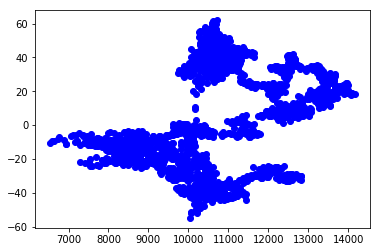

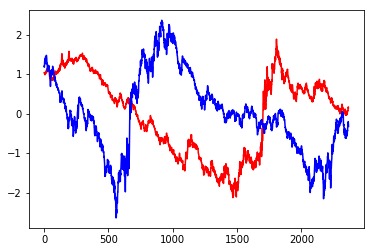

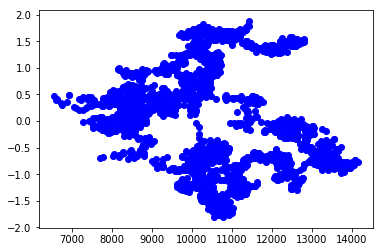

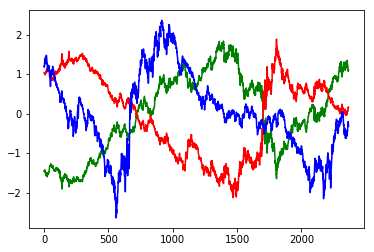

In [5]:
import pandas as pd
from datetime import datetime 
from sklearn.decomposition import PCA,FactorAnalysis
import matplotlib.pyplot as plt

#读入数据
data=pd.read_csv("./stock_prices.csv")
data['Date'] = [datetime.strptime(x,'%Y-%m-%d') for x in data.Date]
data = data[data['Stock']!='DDR'] #去掉stock==ddr的数据
ndat=data.pivot('Date','Stock','Close') # Reshape data (produce a "pivot" table) based on column values
ndat.head()
ndat = ndat.dropna() # 去除na

#协方差矩阵
cor_mat=ndat.corr()
print (cor_mat)

#主成分分析
pca = PCA()
reduced_X = pca.fit_transform(ndat)
print (pca.explained_variance_ratio_)

pca2=PCA(n_components=1)
market = pca2.fit_transform(ndat)

#与道琼斯指数比较
dji=pd.read_csv("./DJI.csv")
dji=dji.dropna()
dji['Date'] = [datetime.strptime(x,'%Y/%m/%d') for x in dji.Date]
dji.head()
dji_sub=dji[dji.Date.isin(ndat.index)]
dji_close=dji_sub['Close']


fig=plt.figure()
plt.scatter(dji_close,market,color='blue')
plt.show()


dji_close2=(dji_close-dji_close.mean())/dji_close.std()
market2=-(market-market.mean())/market.std()
fig=plt.figure()
plt.plot(market2,color='red')
plt.plot(dji_close2,color='blue')

#因子分析
fa = FactorAnalysis(n_components=1)
market3=fa.fit_transform(ndat)

fig=plt.figure()
plt.scatter(dji_close,market3,color='blue')
plt.show()

market4=-(market3-market3.mean())/market3.std()
fig=plt.figure()
plt.plot(market4,c="g")
plt.plot(market2,c="r")
plt.plot(dji_close2,c='b')